<a href="https://colab.research.google.com/github/elainedias16/TCC/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BBC News Dataset

# Reading the Dataset and Creating the Dataframe

In [ ]:
import pandas as pd

id_file = '1m41gWGwnLYo0nAEOABnU_MH_SCQHWfjS'
url_file = 'https://drive.google.com/uc?id={}'.format(id_file)

def create_dataframe(path):
    columns=['genre', 'filename', 'title', 'content']
    df =  pd.read_table(
    path,
    header=None,
    names=columns,
    sep= '\t',
    engine= 'python'
    )
    return df


df = create_dataframe(url_file)
df = df.drop(0).reset_index(drop=True)

df.tail()

,genre,filename,title,content
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...
2224,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,..."


In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy.lang.en.examples import sentences

!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Rename filenames

In [ ]:
# In BBC dataset, some filenames have the same name, for example 001.txt, so it's necessary to rename
def rename_filenames(df):
  for index, row in df.iterrows():
      df.at[index, 'filename'] = f"{index}.txt"
  return df

df = rename_filenames(df)

## Create dataset with less samples

In [ ]:
import random

# def create_balanced_small_df(df, genres, num):
#   small_df_list = []
#   for genre in genres:
#     sample_rows = df.sample(num)
#     small_df_list.append(sample_rows)
#   return pd.concat(small_df_list).reset_index(drop=True)

def create_imbalanced_small_df(df, genres, max_value):
  small_df_list = []
  for genre in genres:
    qtd = random.randint(1, max_value)
    # print(qtd)
    sample_rows = df[df['genre'] == genre].sample(qtd)
    small_df_list.append(sample_rows)
  return pd.concat(small_df_list).reset_index(drop=True)


In [ ]:
genres = df['genre'].unique()
small_df = create_imbalanced_small_df(df, genres, max_value=15)
small_df

,genre,filename,title,content
0,business,275.txt,India power shares jump on debut,"Shares in India's largest power producer, Nat..."
1,business,149.txt,Shares hit by MS drug suspension,Shares in Elan and Biogen Idec plunged on Mon...
2,business,377.txt,Ukraine strikes Turkmen gas deal,Ukraine has agreed to pay 30% more for natura...
3,business,370.txt,Singapore growth at 8.1% in 2004,"Singapore's economy grew by 8.1% in 2004, its..."
4,business,99.txt,Ebbers denies WorldCom fraud,Former WorldCom chief Bernie Ebbers has denie...
5,business,60.txt,Further rise in UK jobless total,The UK's jobless total rose for the second mo...
6,entertainment,744.txt,Pop band Busted to 'take a break',Chart-topping pop band Busted have confirmed ...
7,entertainment,807.txt,Spider-Man creator wins profits,Spider-Man creator Stan Lee is to get a multi...
8,entertainment,819.txt,BBC denies Blackadder TV comeback,The BBC has said there are no plans in the pi...
9,entertainment,560.txt,Foxx and Swank win US awards,Jamie Foxx and Hilary Swank have won the Scre...


# Pre Processing

In [ ]:
def remove_non_alphanumeric(text):
    words = ''
    for w in text:
        words += w if w.isalnum() else ' '
    return words

def remove_accents(text):
  return unidecode.unidecode(text)


def lowercasting(tokens):
  tokens = [w.lower() for w in tokens]
  return tokens

def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english')) #List of stop words in english
  tokens = [token for token in tokens if token not in stop_words]
  return tokens


def stemming(tokens):
  porter = PorterStemmer()
  tokens = [porter.stem(token) for token in tokens]
  return tokens


def lemmanization(text):
    nlp = spacy.load("en_core_web_sm")    # Load English language model
    doc = nlp(text)   # Process the text using the Spacy NLP
    tokens = [token.lemma_ for token in doc]
    return tokens


def pre_processing_aux(text):
  words = remove_non_alphanumeric(text)
  words = remove_accents(words)
  tokens = word_tokenize(words)
  tokens = lowercasting(tokens)
  tokens = remove_stop_words(tokens)
  words = ' '.join(tokens)
  tokens = lemmanization(words)
  tokens = stemming(tokens)
  return ' '.join(tokens)


In [ ]:
def pre_processing(df):
    df['content'] = df['content'].apply(pre_processing_aux)
    return df

###########################################################
# To prossegue with all dataset, put df on parameter
# To prossegue with small dataset, put small_df in paramter
############################################################

df = pre_processing(small_df)
df.tail()

,genre,filename,title,content
42,tech,2205.txt,Tough rules for ringtone sellers,firm flout rule rington mobil extra sell could...
43,tech,2016.txt,Gadget market 'to grow in 2005',explos consum technolog continu 2005 deleg wor...
44,tech,2053.txt,Hi-tech posters guide commuters,interact poster help london get around citi fe...
45,tech,2149.txt,DVD copy protection strengthened,dvd hard copi thank new anti piraci measur dev...
46,tech,2127.txt,Format wars could 'confuse users',technolog firm soni philip matsushita samsung ...


# Basic statistics analysis

##Documents number by class

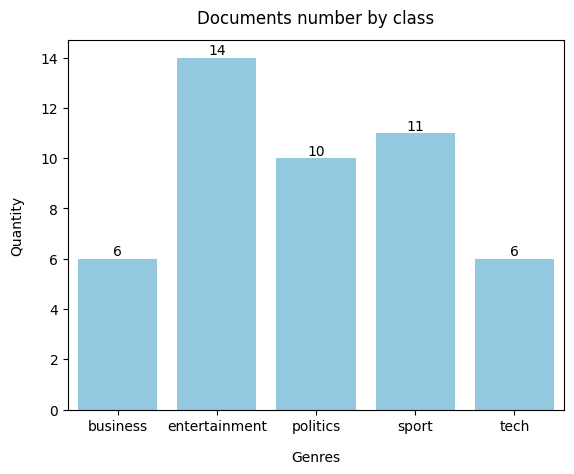

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

genres = df['genre'].unique()

def plot_doc_by_class(genres):
  ax = sns.countplot(x = 'genre', data = df , color='skyblue')
  ax.yaxis.grid(False)
  plt.title('Documents number by class', pad=12)
  plt.xlabel('Genres', labelpad=12)
  plt.ylabel('Quantity', labelpad=12)

  bars = ax.patches
  # Put numbers of docs above bars
  for bar in bars:
        height = int(bar.get_height())
        plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

  plt.show()


plot_doc_by_class(genres)

#Top 30 most frequent words

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn

def get_genre_content(df, genre):
  content = df.loc[df['genre'] == genre, 'content'].str.cat(sep=' ')
  return content

def create_dict_content(df):
  dict_content = {}
  for genre in genres:
      dict_content[genre] = get_genre_content(df, genre)
      if 'all' in dict_content:
        dict_content['all'] += get_genre_content(df, genre)
      else:
          dict_content['all'] = get_genre_content(df, genre)
  return dict_content

def create_count_content(dict_content):
  count_content = {}
  for genre, content in dict_content.items():
      count_content[genre] = Counter(content.split())
  return count_content


def get_top_n_words(top_n, count_words):
    most_common_words = {}
    for word, count in count_words.most_common(top_n):
        most_common_words[word] = count
    return most_common_words


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def plot_h_most_common_words(top_n, count_content, genre, title, fontsize):
    most_common = get_top_n_words(top_n, count_content[genre])
    most_common = sorted(most_common.items(), key=lambda x: x[1])
    words = [item[0] for item in most_common ]
    counts = [item[1] for item in most_common ]
    plt.figure(figsize=(11, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Quantity', labelpad=15)
    plt.ylabel('Tokens', labelpad=15)
    plt.grid(False)
    plt.title(title, pad=15)
    #Display number of token in front of each bar
    for i in range(len(words)):
      plt.text(counts[i], i, ' ' + str(counts[i]), ha='left', va='center')

dict_content = create_dict_content(df)
count_content = create_count_content(dict_content)

In [ ]:
print(count_content)

{'business': Counter({'say': 15, 'mr': 14, 'firm': 11, 'compani': 10, 'share': 9, 'ga': 9, 'ebber': 9, 'rise': 8, 'price': 8, 'new': 7, 'analyst': 7, 'last': 7, 'work': 7, 'year': 7, '000': 7, 'quarter': 7, 'sullivan': 7, '1': 6, 'economi': 6, 'tysabri': 6, 'account': 6, 'turkmenistan': 6, '4': 6, 'tell': 6, 'larg': 5, 'power': 5, 'ntpc': 5, 'stock': 5, 'second': 5, 'world': 5, 'elan': 5, 'biogen': 5, 'case': 5, 'lead': 5, 'growth': 5, 'fall': 5, 'suppli': 5, '2004': 5, 'rate': 5, 'number': 5, 'peopl': 5, 'india': 4, 'produc': 4, 'govern': 4, 'state': 4, 'million': 4, 'three': 4, 'month': 4, 'would': 4, 'use': 4, 'idec': 4, 'increas': 4, 'question': 4, 'deal': 4, 'singapor': 4, 'figur': 4, 'sector': 4, '3': 4, 'worldcom': 4, 'deni': 4, 'one': 4, 'sale': 3, 'rais': 3, 'time': 3, 'invest': 3, 'need': 3, 'set': 3, 'multipl': 3, 'sclerosi': 3, 'patient': 3, 'exchang': 3, 'lose': 3, 'avonex': 3, 'product': 3, 'face': 3, 'expect': 3, 'bring': 3, 'sinc': 3, 'four': 3, 'uk': 3, 'ukrain': 3, 'r

##Top 30 most frequent tokens in business

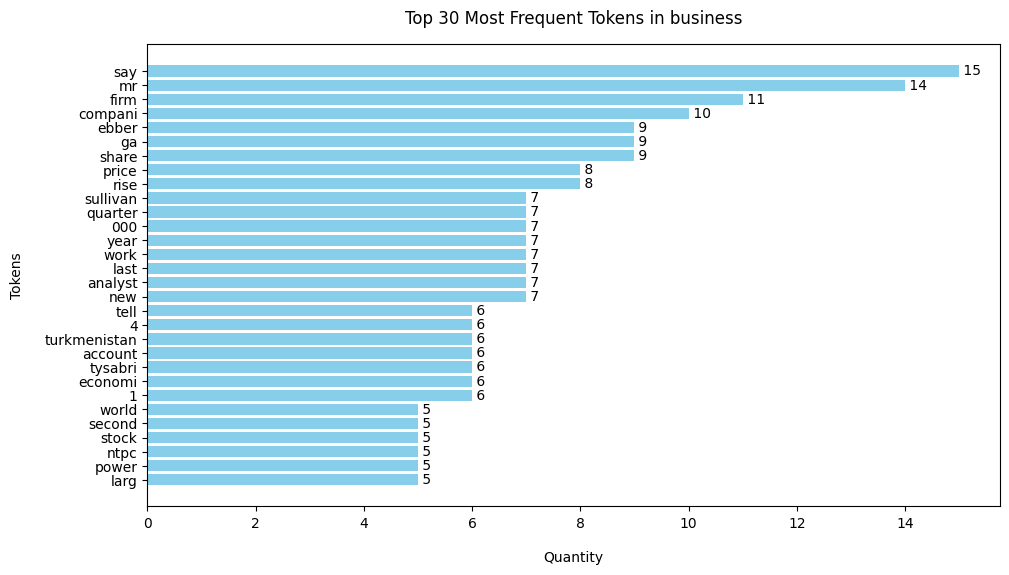

In [ ]:
top_n = 30
fontsize = 12
title_business = 'Top {} Most Frequent Tokens in business'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'business', title_business, fontsize)
# common_words_business = get_top_n_words(top_n, count_content['business'])
# print(common_words_business)

##Top 30 most frequent tokens in entertainment




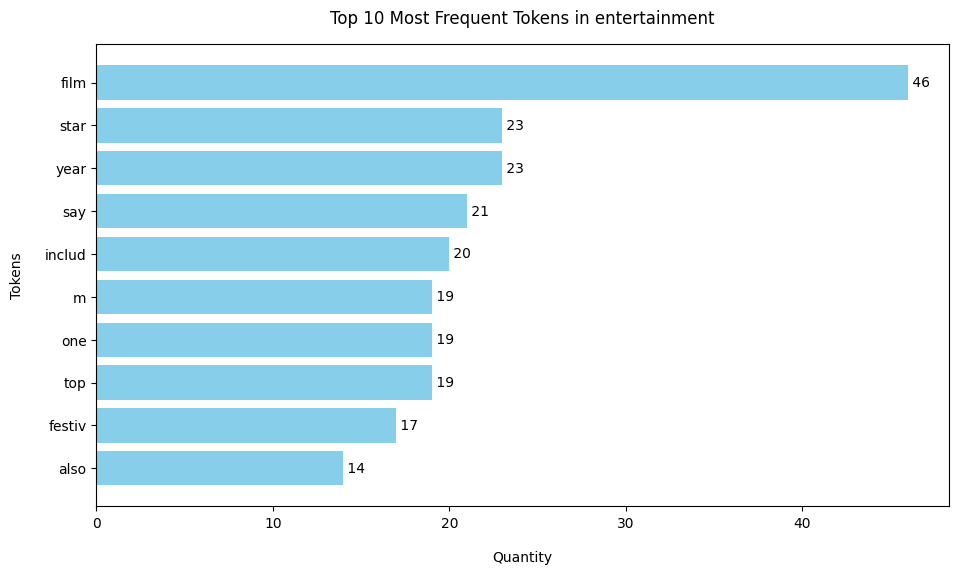

In [ ]:
top_n = 10
fontsize = 12
title_entertainment = 'Top {} Most Frequent Tokens in entertainment'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'entertainment', title_entertainment, fontsize)
# common_words_entertainment = get_top_n_words(top_n, count_content['entertainment'])
# print(common_words_entertainment)

##Top 30 most frequent tokens in politics

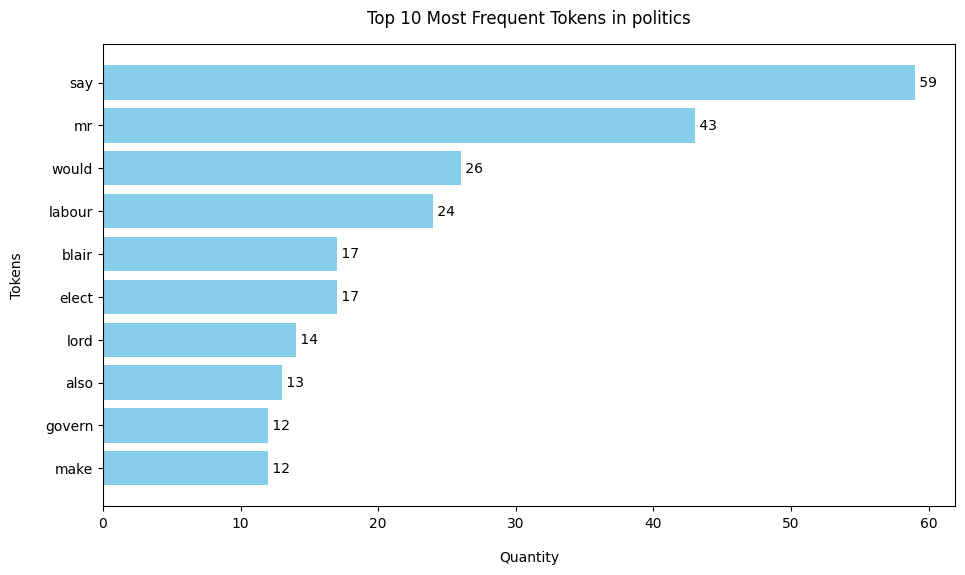

In [ ]:
top_n = 10
fontsize = 12
title_politics = 'Top {} Most Frequent Tokens in politics'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'politics', title_politics, fontsize)
# common_words_politics = get_top_n_words(top_n, count_content['politics'])
# print(common_words_politics)

##Top 30 most frequent tokens in sport

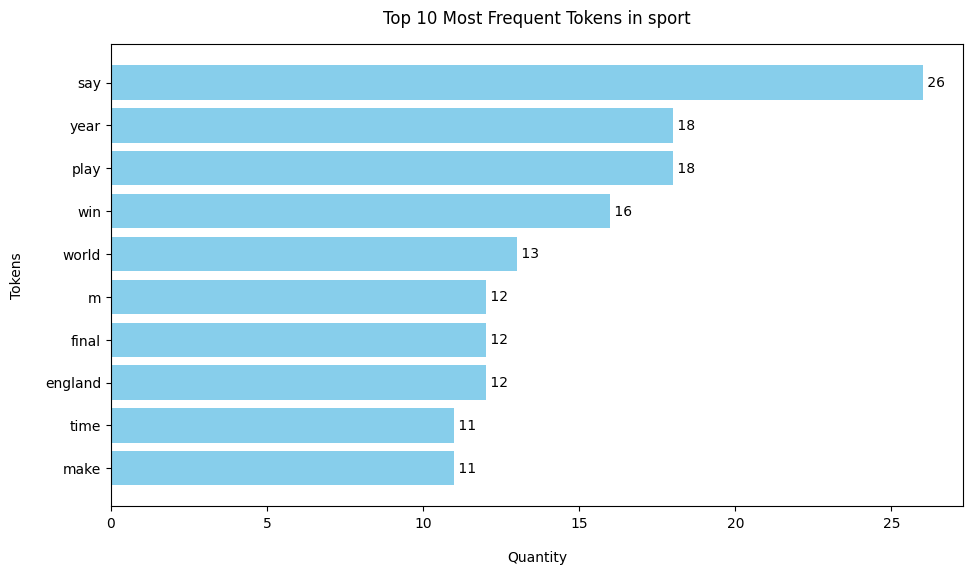

In [ ]:
top_n = 10
fontsize = 12
title_sport = 'Top {} Most Frequent Tokens in sport'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'sport', title_sport, fontsize)
# common_words_sport = get_top_n_words(top_n, count_content['sport'])
# print(common_words_sport)

##Top 30 most frequent tokens in tech

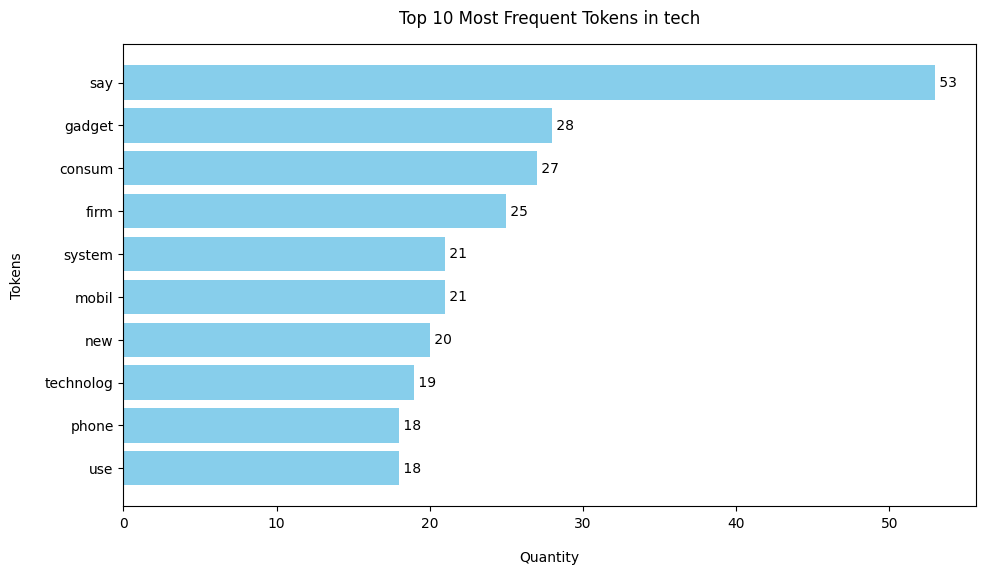

In [ ]:
top_n = 10
fontsize = 12
title_tech = 'Top {} Most Frequent Tokens in tech'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'tech', title_tech, fontsize)
# common_words_tech = get_top_n_words(top_n, count_content['tech'])
# print(common_words_politics)

##Top 30 most frequent tokens in all dataset

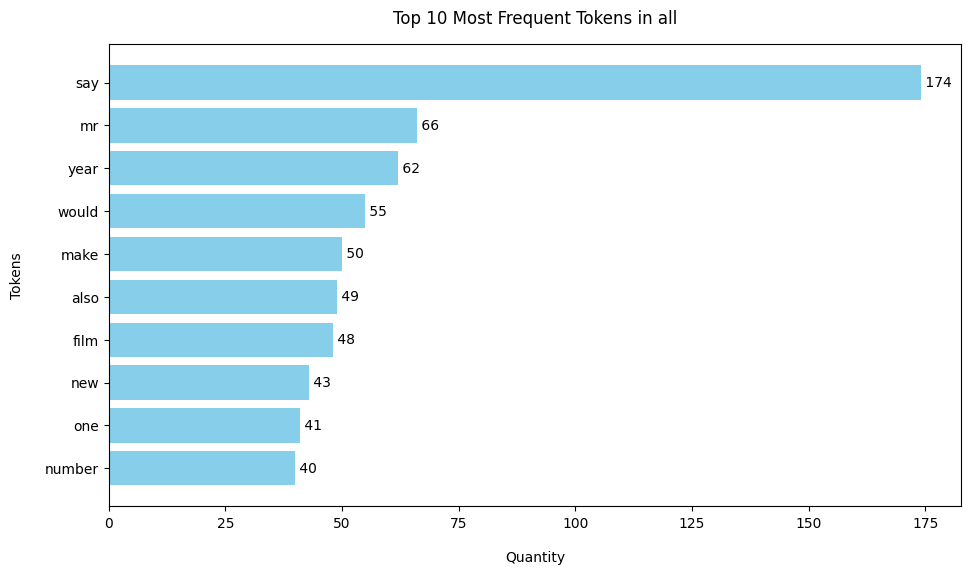

In [ ]:
top_n = 10
fontsize = 12
title_all = 'Top {} Most Frequent Tokens in all'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'all', title_all, fontsize)
# common_words_all = get_top_n_words(top_n, count_content['all'])
# print(common_words_all)

#Frequency of class by word

In [ ]:
import random

#Choose 10 random tokens in all content of news
random_words = random.sample(dict_content['all'].split(), 3)
print("random words: ", random_words)

def get_counts_by_genre(word, count_genres):
    counts_by_genre = {}  #Dictionary to store word count in each class
    for genre, content_counter in count_genres.items():
        if word in content_counter:
            counts_by_genre[genre] = content_counter[word]  # Adds the word count in the class to the dictionary
    return counts_by_genre


def get_frequency_class_by_word(selected_words, count_genres):
    dict_frequency = {}
    for word in selected_words:
        dict_frequency[word] = get_counts_by_genre(word, count_genres)
    return dict_frequency


dict_frequency = get_frequency_class_by_word(random_words, count_content)
print(dict_frequency)

random words:  ['phytopharm', 'hugh', 'tandi']
{'phytopharm': {'business': 2, 'all': 2}, 'hugh': {'all': 2, 'entertainment': 2}, 'tandi': {'all': 2, 'tech': 2}}


In [ ]:
#Testing
df[df['genre']=='politics']

,genre,filename,title,content
20,politics,1038.txt,Malik rejects all-black MP lists,call ethnic minor shortlist boost number black...
21,politics,1165.txt,Defection timed to hit tax pledge,impecc precis calcul time tori defector robert...
22,politics,1182.txt,Boothroyd calls for Lords speaker,betti boothroyd say hous lord need speaker pee...
23,politics,1132.txt,Kilroy unveils immigration policy,ex chatshow host robert kilroy silk attack uk ...
24,politics,1034.txt,Straw praises Kashmir moves,uk welcom decis india pakistan open bu link ac...
25,politics,1161.txt,Peers debate Crown succession law,peer debat propos chang rule govern success th...
26,politics,1111.txt,Ministers 'naive' over phone-taps,govern naiv refus allow phone tap evid court s...
27,politics,1171.txt,Donor attacks Blair-Brown 'feud',report feud toni blair gordon brown prompt lab...
28,politics,1248.txt,"Analysis: No pain, no gain?",call masoch strategi run iraq war toni blair s...
29,politics,953.txt,EU China arms ban 'to be lifted',eu embargo arm export china like lift next six...


# Frequency of words by documents

In [ ]:
from collections import Counter

def get_frequency(df):
    frequency = {}
    for index, row in df.iterrows():
        filename = row['filename']
        word_counts = dict(Counter(row['content'].split()))
        if filename not in frequency:
          frequency[filename] = word_counts
    return frequency



frequency = get_frequency(df)
print(frequency)


{'275.txt': {'share': 5, 'india': 4, 'larg': 3, 'power': 5, 'produc': 2, 'nation': 1, 'thermal': 1, 'corp': 1, 'ntpc': 5, 'rise': 2, '13': 1, 'stock': 2, 'market': 1, 'debut': 2, 'govern': 3, 'partial': 1, 'sell': 1, 'part': 1, 'controversi': 1, 'programm': 1, 'privatis': 1, 'state': 1, 'run': 1, 'firm': 3, '865': 1, 'million': 1, 'offer': 2, 'mix': 1, 'new': 1, 'sale': 2, 'rais': 1, '54bn': 1, 'rupe': 1, '1': 1, '2bn': 1, 'second': 1, '1bn': 1, 'three': 1, 'month': 1, 'come': 1, 'flotat': 2, 'softwar': 1, 'tata': 1, 'eleven': 1, 'time': 1, 'oversubscrib': 1, 'good': 1, 'invest': 2, 'bet': 1, 'say': 3, 'suha': 1, 'naik': 1, 'analyst': 2, 'ing': 1, 'mutual': 1, 'fund': 1, 'need': 2, 'set': 1, 'benefit': 1, 'success': 1, 'would': 1, 'encourag': 1, 'reduc': 1, 'stake': 1, 'compani': 2, 'use': 1, 'money': 1, 'feed': 1, 'grow': 1, 'countri': 1, 'energi': 1, 'starv': 1, 'economi': 1, 'util': 1, 'sixth': 1, 'world': 1}, '149.txt': {'share': 4, 'elan': 5, 'biogen': 5, 'idec': 4, 'plung': 1, 'm

In [ ]:
df[df['filename']=='253.txt']

,genre,filename,title,content


# Word Index by documents





In [ ]:
def create_word_index(df):
    h = {}
    for index, row in df.iterrows():
        filename = row['filename']
        content = row['content']
        words = content.split()
        for word in words:
            if word not in h:
                h[word] = {}

            if filename not in h[word]:
                h[word][filename] = 1
            else:
                h[word][filename] += 1
    return h

word_index = create_word_index(df)
print(word_index)

{'share': {'275.txt': 5, '149.txt': 4, '807.txt': 1, '1132.txt': 1, '2127.txt': 1}, 'india': {'275.txt': 4, '839.txt': 6, '1034.txt': 4}, 'larg': {'275.txt': 3, '377.txt': 2, '1342.txt': 1, '1832.txt': 1, '2205.txt': 1, '2016.txt': 2}, 'power': {'275.txt': 5, '1034.txt': 1, '1111.txt': 1, '2016.txt': 2}, 'produc': {'275.txt': 2, '377.txt': 2, '839.txt': 1, '554.txt': 1, '751.txt': 1, '843.txt': 1, '550.txt': 1, '605.txt': 1, '850.txt': 1, '1171.txt': 1, '1248.txt': 2, '1797.txt': 1}, 'nation': {'275.txt': 1, '60.txt': 1, '1038.txt': 1, '1132.txt': 1, '1679.txt': 1, '1342.txt': 2, '1585.txt': 1, '1610.txt': 1, '1640.txt': 1}, 'thermal': {'275.txt': 1}, 'corp': {'275.txt': 1}, 'ntpc': {'275.txt': 5}, 'rise': {'275.txt': 2, '370.txt': 1, '60.txt': 5, '1679.txt': 1, '1585.txt': 1, '2016.txt': 2}, '13': {'275.txt': 1, '370.txt': 1, '873.txt': 1, '1038.txt': 1, '1832.txt': 1}, 'stock': {'275.txt': 2, '149.txt': 3}, 'market': {'275.txt': 1, '60.txt': 1, '550.txt': 1, '1832.txt': 4, '2205.txt'

In [ ]:
df[df['filename']=='253.txt']

,genre,filename,title,content


# Seach

## Pre processing in seach query

In [ ]:
query = 'russian movie'
query = pre_processing_aux(query)
print(query)

russian movi


## Search query

In [ ]:
def get_frequency_query(query, word_index):
    query_index = {}
    for word in query.split():
        if word in word_index:
            query_index[word] = word_index[word]
    return query_index


index_query = get_frequency_query(query, word_index)
print(index_query)


def sum_occurrences(index_query):
    f = {}
    for word_dict in index_query.values():
        for filename, count in word_dict.items():
            if filename not in f:
                f[filename] = count
            else:
                f[filename] += count

    return f

occurrences = sum_occurrences(index_query)
print(occurrences)

{'movi': {'807.txt': 2, '839.txt': 1, '873.txt': 3, '2149.txt': 1, '2127.txt': 1}}
{'807.txt': 2, '839.txt': 1, '873.txt': 3, '2149.txt': 1, '2127.txt': 1}


In [ ]:
def sort_sum_occurrences(occurrences):
  sorted_occurences = sorted(occurrences.items(), key=lambda x : x[1], reverse=True) #reverse is descr order
  return sorted_occurences


def get_top_n_docs(occurences, top_n):
  occurences = dict(occurences)
  docs = list(occurences.keys())[:top_n]
  return docs

sorted_occurences = sort_sum_occurrences(occurrences)
print(sorted_occurences)

top_n = 5
docs = get_top_n_docs(sorted_occurences, top_n)
print(docs)

[('873.txt', 3), ('807.txt', 2), ('839.txt', 1), ('2149.txt', 1), ('2127.txt', 1)]
['873.txt', '807.txt', '839.txt', '2149.txt', '2127.txt']


# Classifier

## Define test and training set

In [ ]:
from sklearn.model_selection import train_test_split

def create_test_training_split(df, percent):
    train_dfs = []
    test_dfs = []
    grouped = df.groupby('genre')
    for genre, group_df in grouped:
        train_df, test_df = train_test_split(group_df, test_size=percent, random_state=42)
        train_dfs.append(train_df)
        test_dfs.append(test_df)

    train_df = pd.concat(train_dfs).reset_index(drop=True)
    test_df = pd.concat(test_dfs).reset_index(drop=True)
    X_train = train_df.drop('genre', axis=1)
    y_train = train_df['genre']
    X_test = test_df.drop('genre', axis=1)
    y_test = test_df['genre']

    # return train_df, test_df
    return X_train, y_train, X_test, y_test



percent_test = 0.2
# train_df, test_df = create_test_training_split(df, percent_test)
X_df_train, y_df_train, X_df_test, y_df_test = create_test_training_split(df, percent_test)



In [ ]:
# X_df_train.head()
X_df_train.shape[0]

35

In [ ]:
# train_df, test_df = create_test_training_split(df, percent_test)

## Create dictionary for different words in training set

In [ ]:
# def create_unique_words(content):
#   words = content.split()
#   #set function doesn't differentiate between uppercase/lowercase and accents,
#   #so it's necessary to preprocess first
#   return set(words)

# content_train = train_df['content'].str.cat(sep=' ')
# unique_words_set_train = create_unique_words(content_train)

# print(unique_words_set_train)
# print(len(unique_words_set_train))

def create_unique_words(content):
  words = content.split()

  # dict_words é um dicionário que mapeia uma palavra em um índice
  # agua -> 0
  # casa -> 1
  # bola -> 2
  # ...
  dict_words = {}

  for word in words:
    if word not in dict_words:
      dict_words[word] = len(dict_words)

  return dict_words


content_train = X_df_train['content'].str.cat(sep=' ')
unique_words_set_train = create_unique_words(content_train)

print(unique_words_set_train)
print(len(unique_words_set_train))

{'uk': 16, 'jobless': 2, 'total': 2, 'rise': 9, 'second': 10, 'month': 12, 'row': 2, 'decemb': 4, 'offici': 11, 'figur': 9, 'show': 25, 'number': 29, 'peopl': 22, 'work': 24, '32': 1, '000': 18, '1': 12, '41': 1, 'million': 11, 'last': 15, 'three': 12, '2004': 11, 'even': 11, '90': 1, 'employ': 3, 'averag': 2, 'earn': 4, '4': 10, '3': 8, 'year': 47, 'novemb': 2, '2': 8, 'offic': 5, 'nation': 8, 'statist': 1, 'on': 1, 'add': 13, 'meanwhil': 4, 'benefit': 3, 'claimant': 1, 'fall': 5, '11': 3, '813': 1, '200': 1, 'throughout': 1, 'increas': 3, '296': 1, '28': 1, '52': 3, 'high': 6, 'sinc': 9, 'record': 17, 'begin': 6, '1971': 1, 'appar': 1, 'discrep': 1, 'unemploy': 1, 'explain': 2, 'popul': 1, 'econom': 2, 'inact': 1, 'rate': 7, '7': 5, '6': 3, 'previou': 4, 'quarter': 7, 'still': 3, 'remain': 4, 'one': 29, 'low': 4, 'world': 14, 'compar': 2, '12': 4, 'germani': 3, '10': 12, 'spain': 2, '9': 2, 'franc': 7, 'despit': 5, 'manufactur': 2, 'sector': 4, 'continu': 6, 'suffer': 3, '104': 1, 'w

## Tranform each doc in a vector

## Binary

In [ ]:
"""
def create_binary_array_doc_aux_original(content, unique_words):
    tokens = content.split()
    binary_array = []
    for word in unique_words.keys():
        if word in tokens:
            binary_array.append(1)
        else:
            binary_array.append(0)
    return binary_array
"""

def create_binary_array_doc_aux(content, unique_words):
    tokens = content.split()

    binary_array = np.zeros((len(unique_words), ))

    for word in tokens:
        if word in unique_words:  # O(1)
            idx =  unique_words[word]
            binary_array[idx] = 1

    return binary_array


def create_binary_array_doc(df, unique_words):
    binary_words = {}
    for index, row in df.iterrows():
        filename = row['filename']
        content = row['content']
        binary_array = create_binary_array_doc_aux(content, unique_words)
        binary_words[filename] = binary_array

    return binary_words


binary_word_dict = create_binary_array_doc(X_df_train, unique_words_set_train)
# binary_word_dict
binary_word_array = list(binary_word_dict.values())
print(binary_word_array)

X_train =  binary_word_array
X_test = create_binary_array_doc(X_df_test, unique_words_set_train)
X_test = list(X_test)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(f"len X_train {len(X_train)}")
print(f'len X_test {len(X_test)}')
X_train

In [ ]:
#################### Testing ###########################
def count_ones(vector):
  count = 0
  for element in vector:
    if element == 1:
      count += 1
  return count

num = '60.txt'

#print binray dict of 216.txt file
print(f"Binary array of {num} file: {binary_word_dict[num]}")

# print len of binary_word_dict and unique_words_set_train. The size should be the same
print(f"Size of binary_word_vector of file {num} : {len(binary_word_dict[num])}")
print(f"Size of unique_words_set_train : {len(unique_words_set_train)}")

content_file = X_df_train[X_df_train['filename'] == num]['content'].values[0]
# content_377
unique_words_file = create_unique_words(content_file)
# print(unique_words_file)
print(f"Size of unique_words of file: {len(unique_words_file)}")

# The qtd of ones should be the same of unique_words file
num_ones = count_ones(binary_word_dict[num])
print(f"Number of ones in the vector: {num_ones}")

print(f"len of binary_word_dict: {len(binary_word_dict)}")

Binary array of 60.txt file: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

## Frequency of word in docs

In [ ]:
def create_word_frequency_aux(content, unique_words):
    tokens = content.split()

    # cria um array de zeros do tamanho do dicionario de palavras diferentes
    tamanho = (len(unique_words), ) # tupla com um elemento
    word_frequency = np.zeros(tamanho)

    for word in tokens: # para cada palavra no texto
        if word in unique_words:  # se a palavra existe no dicionario de palavras unicas
            idx =  unique_words[word] # recupera o indice da palavra
            word_frequency[idx] += 1 # incrementa a frequencia (vimos a palavra mais uma vez)

    return word_frequency


def create_word_frequency(df, unique_words):
  word_frequency_dict = {}
  for index, row in df.iterrows():
      filename = row['filename']
      content = row['content']
      # word_frequency_dict = create_word_frequency_aux(content, unique_words)
      word_frequency_dict[filename] = create_word_frequency_aux(content, unique_words)

  return word_frequency_dict

In [ ]:
## Testing
word_frequency_file = create_word_frequency_aux(content_file, unique_words_set_train)
print(f"word_frequency_file: {word_frequency_file}")
print(f"unique_words_set_train {unique_words_set_train}")
print("\n")
print([content_file])
print(f"len content file: {len(content_file)}")

word_frequency_file: [2, 2, 2, 5, 1, 3, 1, 2, 1, 3, 1, 3, 4, 5, 1, 5, 2, 1, 3, 4, 1, 3, 1, 1, 2, 1, 1, 5, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
content_file

'uk jobless total rise second month row decemb offici figur show number peopl work rise 32 000 1 41 million last three month 2004 even 90 000 peopl employ averag earn rise 4 3 year decemb novemb 4 2 offic nation statist on add meanwhil benefit claimant total fall 11 000 813 200 last month throughout 2004 number peopl work increas 296 000 28 52 million high figur sinc record begin 1971 appar discrep rise unemploy record number work explain increas work popul fall econom inact uk jobless rate rise 4 7 4 6 previou quarter rate still remain one low world compar 12 1 germani 10 4 spain 9 7 franc despit peopl work manufactur sector continu suffer 104 000 worker axe last quarter 2004 push employ sector record low 3 24 million end last year figur prompt analyst forecast bank england almost certainli rais rate year marc ostwald strategist monument secur tell reuter immedi market impact could expect enough underlin boe hawkish rate'

In [ ]:
word_frequency_dict = create_word_frequency(X_df_train, unique_words_set_train)
print(f"len of word_frequency_file {len(word_frequency_file)}")
print(f"unique_words in file: {create_unique_words(content_file)}")
print(f"len of unique words in file {(len(create_unique_words(content_file)))}")

len of word_frequency_file 2171
unique_words in file: {'uk': 2, 'jobless': 2, 'total': 2, 'rise': 5, 'second': 1, 'month': 3, 'row': 1, 'decemb': 2, 'offici': 1, 'figur': 3, 'show': 1, 'number': 3, 'peopl': 4, 'work': 5, '32': 1, '000': 5, '1': 2, '41': 1, 'million': 3, 'last': 4, 'three': 1, '2004': 3, 'even': 1, '90': 1, 'employ': 2, 'averag': 1, 'earn': 1, '4': 5, '3': 2, 'year': 3, 'novemb': 1, '2': 1, 'offic': 1, 'nation': 1, 'statist': 1, 'on': 1, 'add': 1, 'meanwhil': 1, 'benefit': 1, 'claimant': 1, 'fall': 2, '11': 1, '813': 1, '200': 1, 'throughout': 1, 'increas': 2, '296': 1, '28': 1, '52': 1, 'high': 1, 'sinc': 1, 'record': 3, 'begin': 1, '1971': 1, 'appar': 1, 'discrep': 1, 'unemploy': 1, 'explain': 1, 'popul': 1, 'econom': 1, 'inact': 1, 'rate': 4, '7': 2, '6': 1, 'previou': 1, 'quarter': 2, 'still': 1, 'remain': 1, 'one': 1, 'low': 2, 'world': 1, 'compar': 1, '12': 1, 'germani': 1, '10': 1, 'spain': 1, '9': 1, 'franc': 1, 'despit': 1, 'manufactur': 1, 'sector': 2, 'contin

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def create_tfidf_aux(content, unique_words):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(unique_words)
    tfidf = tfidf_vectorizer.transform([content])
    return tfidf


# def create_tfidf(df, unique_words):
#     tfidf_vectorizer = TfidfVectorizer(min_df=0)
#     tfidf_matrix = []

#     for index, row in df.iterrows():
#         content = row['content']
#         tfidf_array = create_tfidf_aux([content], tfidf_vectorizer)
#         tfidf_matrix.append(tfidf_array[0])
#     return tfidf_matrix



# tf_idf_train = create_tfidf(train_df, unique_words_set_train)

tfidf_train = create_tfidf_aux(content_file, unique_words_set_train)

print("Len tfidf:", tfidf_train )

# train_docs = train_df['content']
# test_docs = test_df['content']

Len tfidf:   (0, 2148)	0.17066403719657233
  (0, 2134)	0.05688801239885744
  (0, 2133)	0.05688801239885744
  (0, 2132)	0.28444006199428723
  (0, 2034)	0.05688801239885744
  (0, 2030)	0.05688801239885744
  (0, 2016)	0.11377602479771488
  (0, 1973)	0.11377602479771488
  (0, 1954)	0.05688801239885744
  (0, 1951)	0.05688801239885744
  (0, 1926)	0.05688801239885744
  (0, 1884)	0.05688801239885744
  (0, 1869)	0.05688801239885744
  (0, 1858)	0.05688801239885744
  (0, 1850)	0.05688801239885744
  (0, 1814)	0.05688801239885744
  (0, 1775)	0.05688801239885744
  (0, 1762)	0.05688801239885744
  (0, 1715)	0.05688801239885744
  (0, 1714)	0.11377602479771488
  (0, 1711)	0.05688801239885744
  (0, 1668)	0.05688801239885744
  (0, 1641)	0.28444006199428723
  (0, 1630)	0.05688801239885744
  (0, 1606)	0.05688801239885744
  :	:
  (0, 268)	0.05688801239885744
  (0, 260)	0.05688801239885744
  (0, 242)	0.05688801239885744
  (0, 231)	0.05688801239885744
  (0, 226)	0.05688801239885744
  (0, 177)	0.056888012398857

# Training classifiers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder



print(X_train)

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


for clf in classifiers:
    clf.fit(X_train, y_df_train)
    train_score = clf.score(X_train, y_df_train)
    test_score = clf.score(X_test, y_df_test)
    print("Train score:", train_score)
    print("Test score:", test_score)





[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,